# Analysis Perspective: Movie Genres

## Business Outcome

   One of the business recommendation we are delivering to the Microsoft Studio team will be about choosing best genres for their future movies. Which genre categories have more ratings, and/or popularity will determine our recommendations. For this analysis, we will use IMDB and TMDB data to measure average ratings and popularity, respectively. In this work, we will focus on the analysis of the movies with release year between 2010 and 2019 .


## The Data


   In the first part of the analysis, we will investigate average ratings and genre relationship. Secondly, we will use popularity measure to look into each genre. In the final part, we will compare the results from each analysis, and make recommendations accordingly.
   
   We will use IMDB ratings data, stored in 'imdb.title.ratings.csv.gz' file, IMDB movie title basisc data stored in 'imdb.title.basics.csv' file, and TMDB movies data in 'tmdb.movies.csv' file. 
   
   Let's start by importing the libraries needed to perform data exploration, analysis, and data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Aidan's Cast and Crew Analysis .ipynb
Emine's Genre Analysis.ipynb
README.md
bom.movie_gross.csv
emine.ipynb
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv.gz
imdb.title.principals.csv
imdb.title.ratings.csv.gz
kaggle_tmdb_movies_data.csv
rt.movie_info.tsv
rt.reviews.csv
rt.reviews.numbers
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


## 1. Movie Genres vs. Average Rating Relationship

### 1.1. Importing the Data

First we need to read IMDB ratings data and IMDB movie basic data files. 

In [3]:
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


### 1.2. Preparing Dataframes 

#### 1.2.1. Merging Dataframes
Before analyzing the data, we need to construct the desired dataframe from IMDB title basics table and IMDB title ratings table. 

First of all, let's start with merging these two datafames by using 'tconst' column in both dataframes, and create a new 'imdb_title_and_ratings' dataframe.     

In [5]:
imbd_title_and_ratings = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst')
imbd_title_and_ratings

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


When we sort 'imbd_title_and_ratings' dataframe by the 'start_year' column, it is seen that the data contains movies from 2010 to 2019:

In [6]:
imbd_title_and_ratings.sort_values(by='start_year', ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
23991,tt5929354,5.1,18,"Out of Sight, Out of Mind","Out of Sight, Out of Mind",2019,131.0,Drama
24002,tt5969180,6.5,1312,I Hate Kids,I Hate Kids,2019,89.0,Comedy
24012,tt6032090,8.6,15,Use Me,Use Me,2019,NaN,Thriller
24028,tt6081668,7.6,51,Mating,Parningsmarknaden,2019,93.0,Documentary
...,...,...,...,...,...,...,...,...
36328,tt1754573,8.8,21,Taliya.Date.Com,Taliya.Date.Com,2010,54.0,"Biography,Comedy,Documentary"
36325,tt1753960,7.4,67,Israel vs Israel,Israel vs Israel,2010,58.0,Documentary
17412,tt1640202,4.3,3706,Çok Filim Hareketler Bunlar,Çok Filim Hareketler Bunlar,2010,134.0,Comedy
17411,tt1639457,5.6,11,Indiana Jones und der Speer des Schicksals,Indiana Jones und der Speer des Schicksals,2010,66.0,"Action,Adventure"


Now, we need to sort the dataframe from highest to lowest rating movie!

We need to split genre names into separate categories!


In [7]:
sorted_df = imbd_title_and_ratings.sort_values(by='averagerating', ascending=False)
sorted_df['genres']= sorted_df['genres'].str.split(",")
sorted_df = sorted_df.explode('genres')
sorted_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Crime
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Documentary
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
...,...,...,...,...,...,...,...,...
32440,tt2087999,1.0,7,Transgender Trouble,Transgender Trouble,2011,100.0,Music
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Drama
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Music
54856,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama


#### 1.2.2. Genre Counts

In our analysis, we need to compare average ratings with genres. 

We can look into the genre types in the 'sorted_df' dataframe, and see number of movie produced in each genre between 2010 and 2019. 

In [8]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

We will filter out any genre which has less than 30 entries due to respresentation concerns. According to value counts above, we need to filter out all movies with genres as Reality-TV, Adult, Game-Show, and Short from our analysis.

In [9]:
sorted_df = sorted_df[(sorted_df.genres != 'Reality-TV') & 
                      (sorted_df.genres != 'Adult') & 
                      (sorted_df.genres != 'Game-Show') & 
                      (sorted_df.genres != 'Short')]

In [10]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Name: genres, dtype: int64

### 1.3. Grouping Average Ratings by Genres

We will group by genres and calculate average ratings associated with each genre.

In [11]:
imdb_mov_rat = sorted_df[['averagerating', 'genres']]
imdb_mov_rat

,averagerating,genres
27644,10.0,Documentary
8992,10.0,Crime
8992,10.0,Documentary
26153,10.0,Documentary
65033,10.0,Documentary
...,...,...
32440,1.0,Music
36456,1.0,Drama
36456,1.0,Music
54856,1.0,Drama


In [12]:
imdb_genre_rating_df = imdb_mov_rat.groupby(['genres']).mean().sort_values(by='averagerating', ascending =False)
imdb_genre_rating_df

,averagerating
genres,
Documentary,7.332090
News,7.271330
Biography,7.162274
Music,7.091972
History,7.040956
Sport,6.961493
War,6.584291
Musical,6.498336
Drama,6.401559


### 1.4. Visualization

#### Number of Movies in Each Genre with IMDB Data

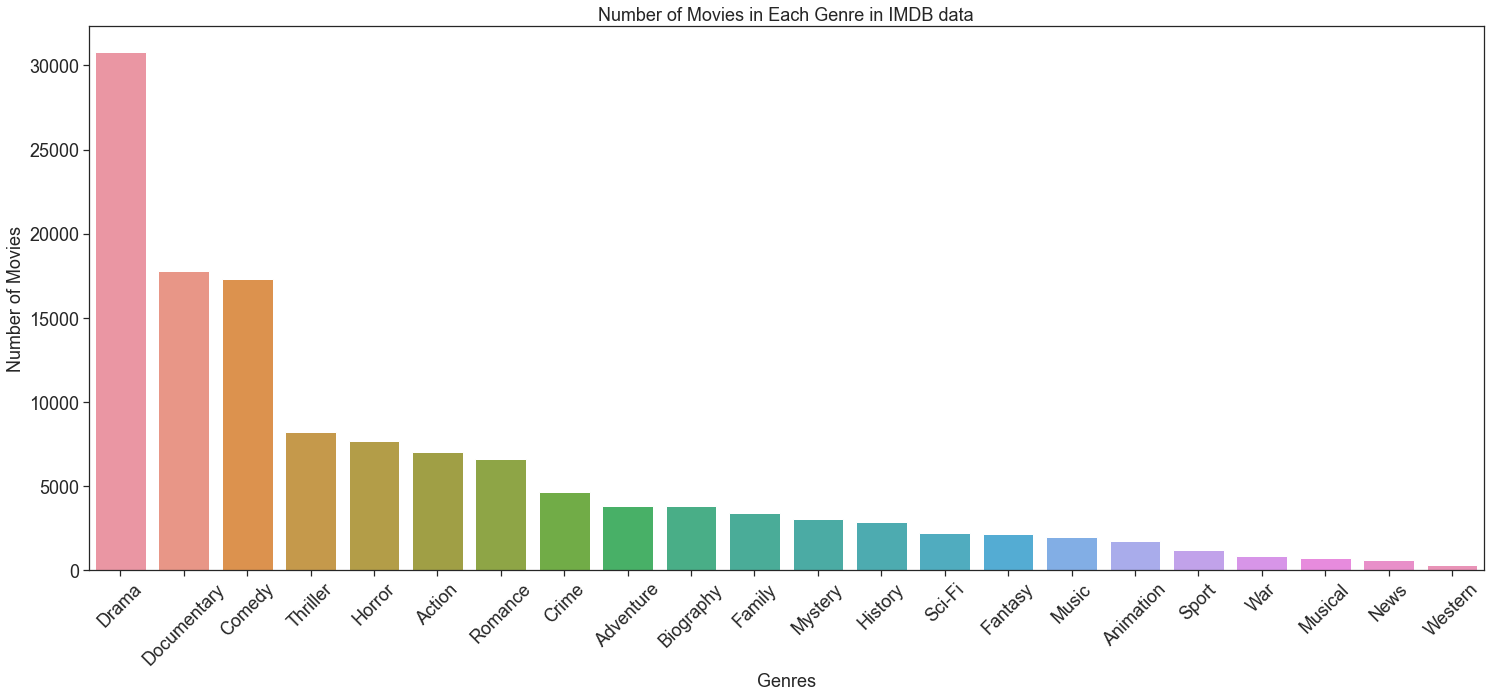

In [13]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(25, 10)) 
ax = sns.countplot(x="genres", data=sorted_df, order=sorted_df['genres'].value_counts().index)
ax.set_title('Number of Movies in Each Genre in IMDB data',fontsize=18)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=18);
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Genres vs. Ratings 

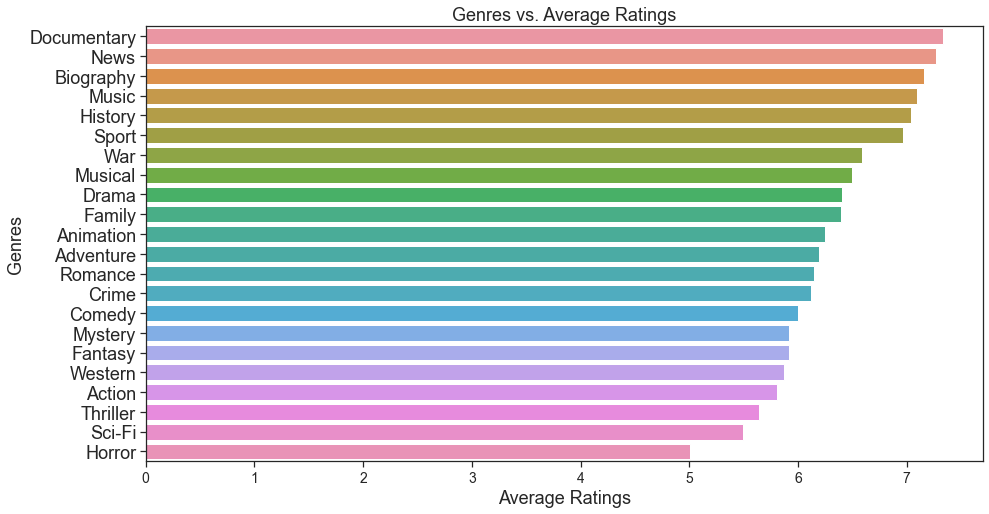

In [14]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=imdb_genre_rating_df.index, x ='averagerating', data=imdb_genre_rating_df)
ax.set_title('Genres vs. Average Ratings', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Average Ratings', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);


From the analysis above, we can conclude that using only average ratings as succes measure is not a good approach. While some genre types have ten thousands of movies, such as Drama and Documentary, the others have only hundreds, such as News and Western. Because of this big diffrenece between the number of movies in each genre category, it is not easy to conclude which genre is more successful by only comparing average ratings!

Therefore, we will look into popularity measure for further investigation!

---

## 2. Movie Genres vs. Popularity Relationship

Here we will do analysis according to genres vs popularity measure. 

The data we used for this analysis is TMDB movies data stored in in 'tmdb.movies.csv' file.

For the consistency of the analysis, we will focus on movies released between 2010 - 2019.

### 2.1. Importing the Data

In [15]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### 2.2. Preparing Dataframes 

In [16]:
tmdb['release_year']=pd.DatetimeIndex(tmdb['release_date']).year
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [17]:
tmdb2010_2019= tmdb[(tmdb['release_year']>=2010) & (tmdb['release_year']<2020)] 
tmdb2010_2019['release_year'].value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
2019      63
Name: release_year, dtype: int64

Now, we need to change genre ids into associated genre names. In order to do this we need to define genre id to genre name dictionary to give the key value pairs for each genre type.

In [18]:
genre_id_dict = {"28": "Action", "12": "Adventure", "16": "Animation", "35":"Comedy", "80": "Crime", "99": "Documentary",
                 "18": "Drama", "10751": "Family", "14": "Fantasy", "36": "History", "27": "Horror", "10402": "Music",
                 "9648": "Mystery", "10749": "Romance", "878": "Science Fiction", "10770": "TV Movie", "53": "Thriller",
                 "10752": "War", "37": "Western"}

In [19]:
tmdb2010_2019 = tmdb2010_2019.replace(pd.Series(genre_id_dict).astype(str), regex=True)
tmdb2010_2019

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,2010
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[Horror, Drama]",488143,en,Laboratory Conditions,0.600,20Drama-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[Drama, Thriller]",485975,en,_EXHIBIT_84xxx_,0.600,20Drama-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,2018
26515,26515,"[Family, Adventure, Action]",366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018


In [20]:
tmdb2010_2019['genre_ids']= tmdb2010_2019['genre_ids'].str.strip(" ] [")

In [21]:
tmdb2010_2019['genre_ids'].value_counts()

Documentary                                   3687
                                              2472
Drama                                         2248
Comedy                                        1653
Horror                                        1139
                                              ... 
Romance, TV Movie, Drama, Family                 1
Action, Horror, Science Fiction, Comedy          1
Music, TV Movie, Drama                           1
Science Fiction, Comedy, Action, Adventure       1
Thriller, Crime, Action, Drama                   1
Name: genre_ids, Length: 2452, dtype: int64

It is seen from value counts of each genre, we have null values. Before exploding each genre type as a new row, wee need to drop of rows with null genre entries. 

In [22]:
# Here is all the genres with null entries.
tmdb2010_2019[tmdb2010_2019['genre_ids'] == str()]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
517,517,,31059,ru,Наша Russia: Яйца судьбы,3.867,2010-01-21,Nasha Russia: Yaytsa sudby,4.3,25,2010
559,559,,151316,en,Shrek’s Yule Log,3.424,2010-Adventure-07,Shrek’s Yule Log,4.7,9,2010
589,589,,75828,en,Erratum,3.154,2010-09-Animation,Erratum,6.6,7,2010
689,689,,150782,en,Bikini Frankenstein,2.625,2010-01-Drama,Bikini Frankenstein,6.0,4,2010
731,731,,200946,en,Weakness,2.451,2010-10-24,Weakness,4.5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...
26495,26495,,556601,en,Recursion,0.600,20Drama-08-Action,Recursion,2.0,1,2018
26497,26497,,514045,en,The Portuguese Kid,0.600,20Drama-02-Fantasy,The Portuguese Kid,2.0,1,2018
26498,26498,,497839,en,The 23rd Annual Critics' Choice Awards,0.600,20Drama-01-11,The 23rd Annual Critics' Choice Awards,2.0,1,2018
26500,26500,,561932,en,Two,0.600,20Drama-02-04,Two,1.0,1,2018


In [23]:
tmdb2010_2019_clean = tmdb2010_2019[tmdb2010_2019['genre_ids'] != str()]

In [24]:
tmdb2010_2019_clean['genre_ids'].value_counts()

Documentary                                   3687
Drama                                         2248
Comedy                                        1653
Horror                                        1139
Thriller                                       479
                                              ... 
Romance, TV Movie, Drama, Family                 1
Action, Horror, Science Fiction, Comedy          1
Music, TV Movie, Drama                           1
Science Fiction, Comedy, Action, Adventure       1
TV Movie, Romance, Comedy, Drama                 1
Name: genre_ids, Length: 2451, dtype: int64

In [25]:
tmdb2010_2019_clean['genre_ids']= tmdb2010_2019_clean['genre_ids'].str.split(", ")
tmdb_exploded = tmdb2010_2019_clean.explode('genre_ids')
tmdb_exploded

<ipython-input-25-57175bbb6fc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb2010_2019_clean['genre_ids']= tmdb2010_2019_clean['genre_ids'].str.split(", ")


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
1,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,Family,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26515,26515,Adventure,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26515,26515,Action,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26516,26516,Thriller,309885,en,The Church,0.600,20Drama-10-05,The Church,0.0,1,2018


In [26]:
tmdb_exploded['genre_ids'].value_counts()

Drama              8207
Comedy             5597
Documentary        4945
Thriller           4165
Horror             3658
Action             2567
Romance            2294
Science Fiction    1743
Family             1538
Crime              1484
Animation          1452
Adventure          1368
Music              1251
Mystery            1223
Fantasy            1113
TV Movie           1077
History             611
War                 323
Western             204
Name: genre_ids, dtype: int64

In [27]:
tmdb_pop_genre = tmdb_exploded[['popularity', 'genre_ids']]
tmdb_pop_genre

,popularity,genre_ids
0,33.533,Adventure
0,33.533,Fantasy
0,33.533,Family
1,28.734,Fantasy
1,28.734,Adventure
...,...,...
26515,0.600,Family
26515,0.600,Adventure
26515,0.600,Action
26516,0.600,Thriller


### 2.3. Grouping Popularity by Genres

We will group by genres and calculate average popularity for  each genre.

In [28]:
tmdb_pop_genre_df= tmdb_pop_genre.groupby(['genre_ids']).mean().sort_values(by='popularity', ascending =False)
tmdb_pop_genre_df

,popularity
genre_ids,
Adventure,7.506921
Action,6.417480
Fantasy,6.287668
Crime,5.360015
Science Fiction,5.167303
War,5.146235
Thriller,4.781564
Mystery,4.739093
Family,4.618991


### 2.4. Visualization

#### Number of Movies in Each Genre with TMDB data

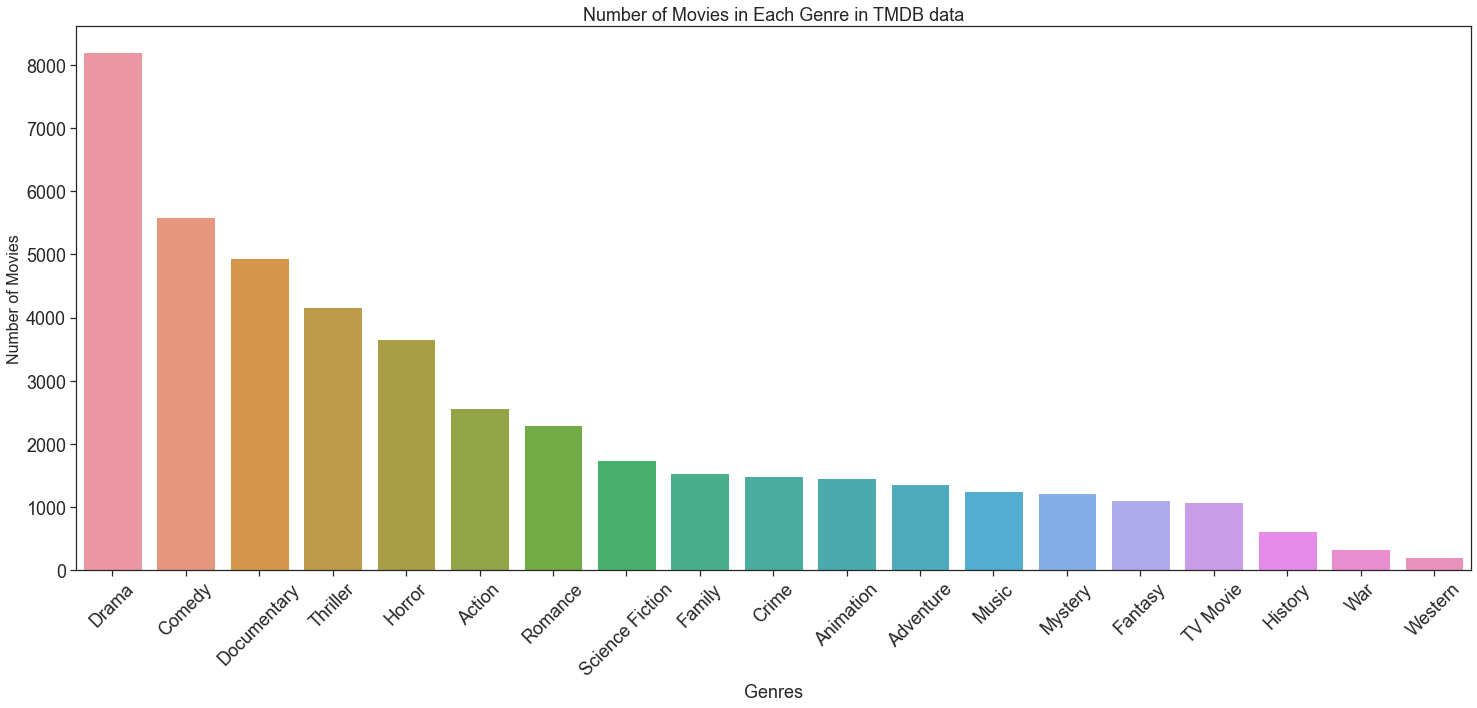

In [29]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(25, 10)) 
ax = sns.countplot(x="genre_ids", data=tmdb_exploded, order=tmdb_exploded['genre_ids'].value_counts().index)
ax.set_title('Number of Movies in Each Genre in TMDB data',fontsize=18)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=16);
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Genres vs. Popularity

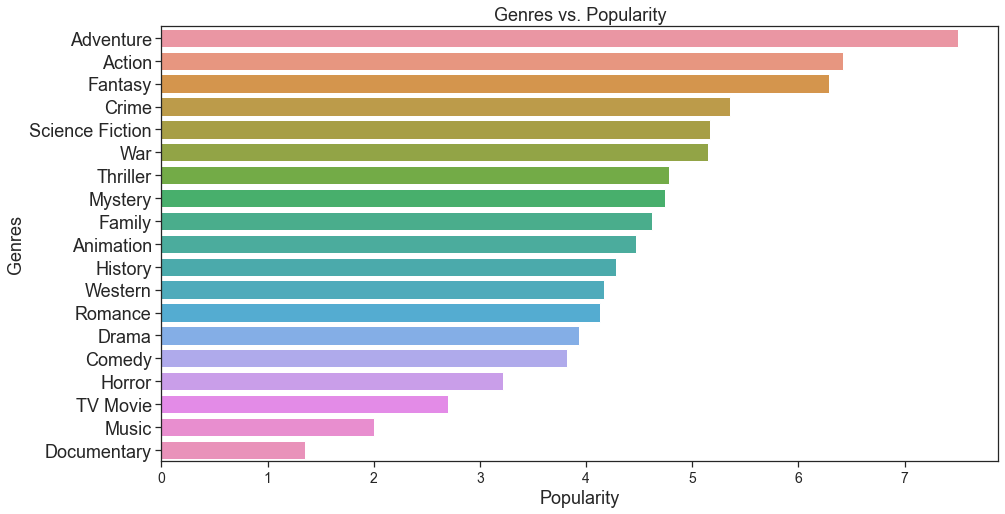

In [30]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=tmdb_pop_genre_df.index, x = 'popularity', data=tmdb_pop_genre_df)
ax.set_title('Genres vs. Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);


Doing an anlysis with popularity measure gave us different results compared to average reatings measure.

Now, let's put two bar charts together and compare our findings!

---

### 3. Comparison and Conclusion

#### 3.1. Comparison of Average Ratings and Popularity Measure Results 

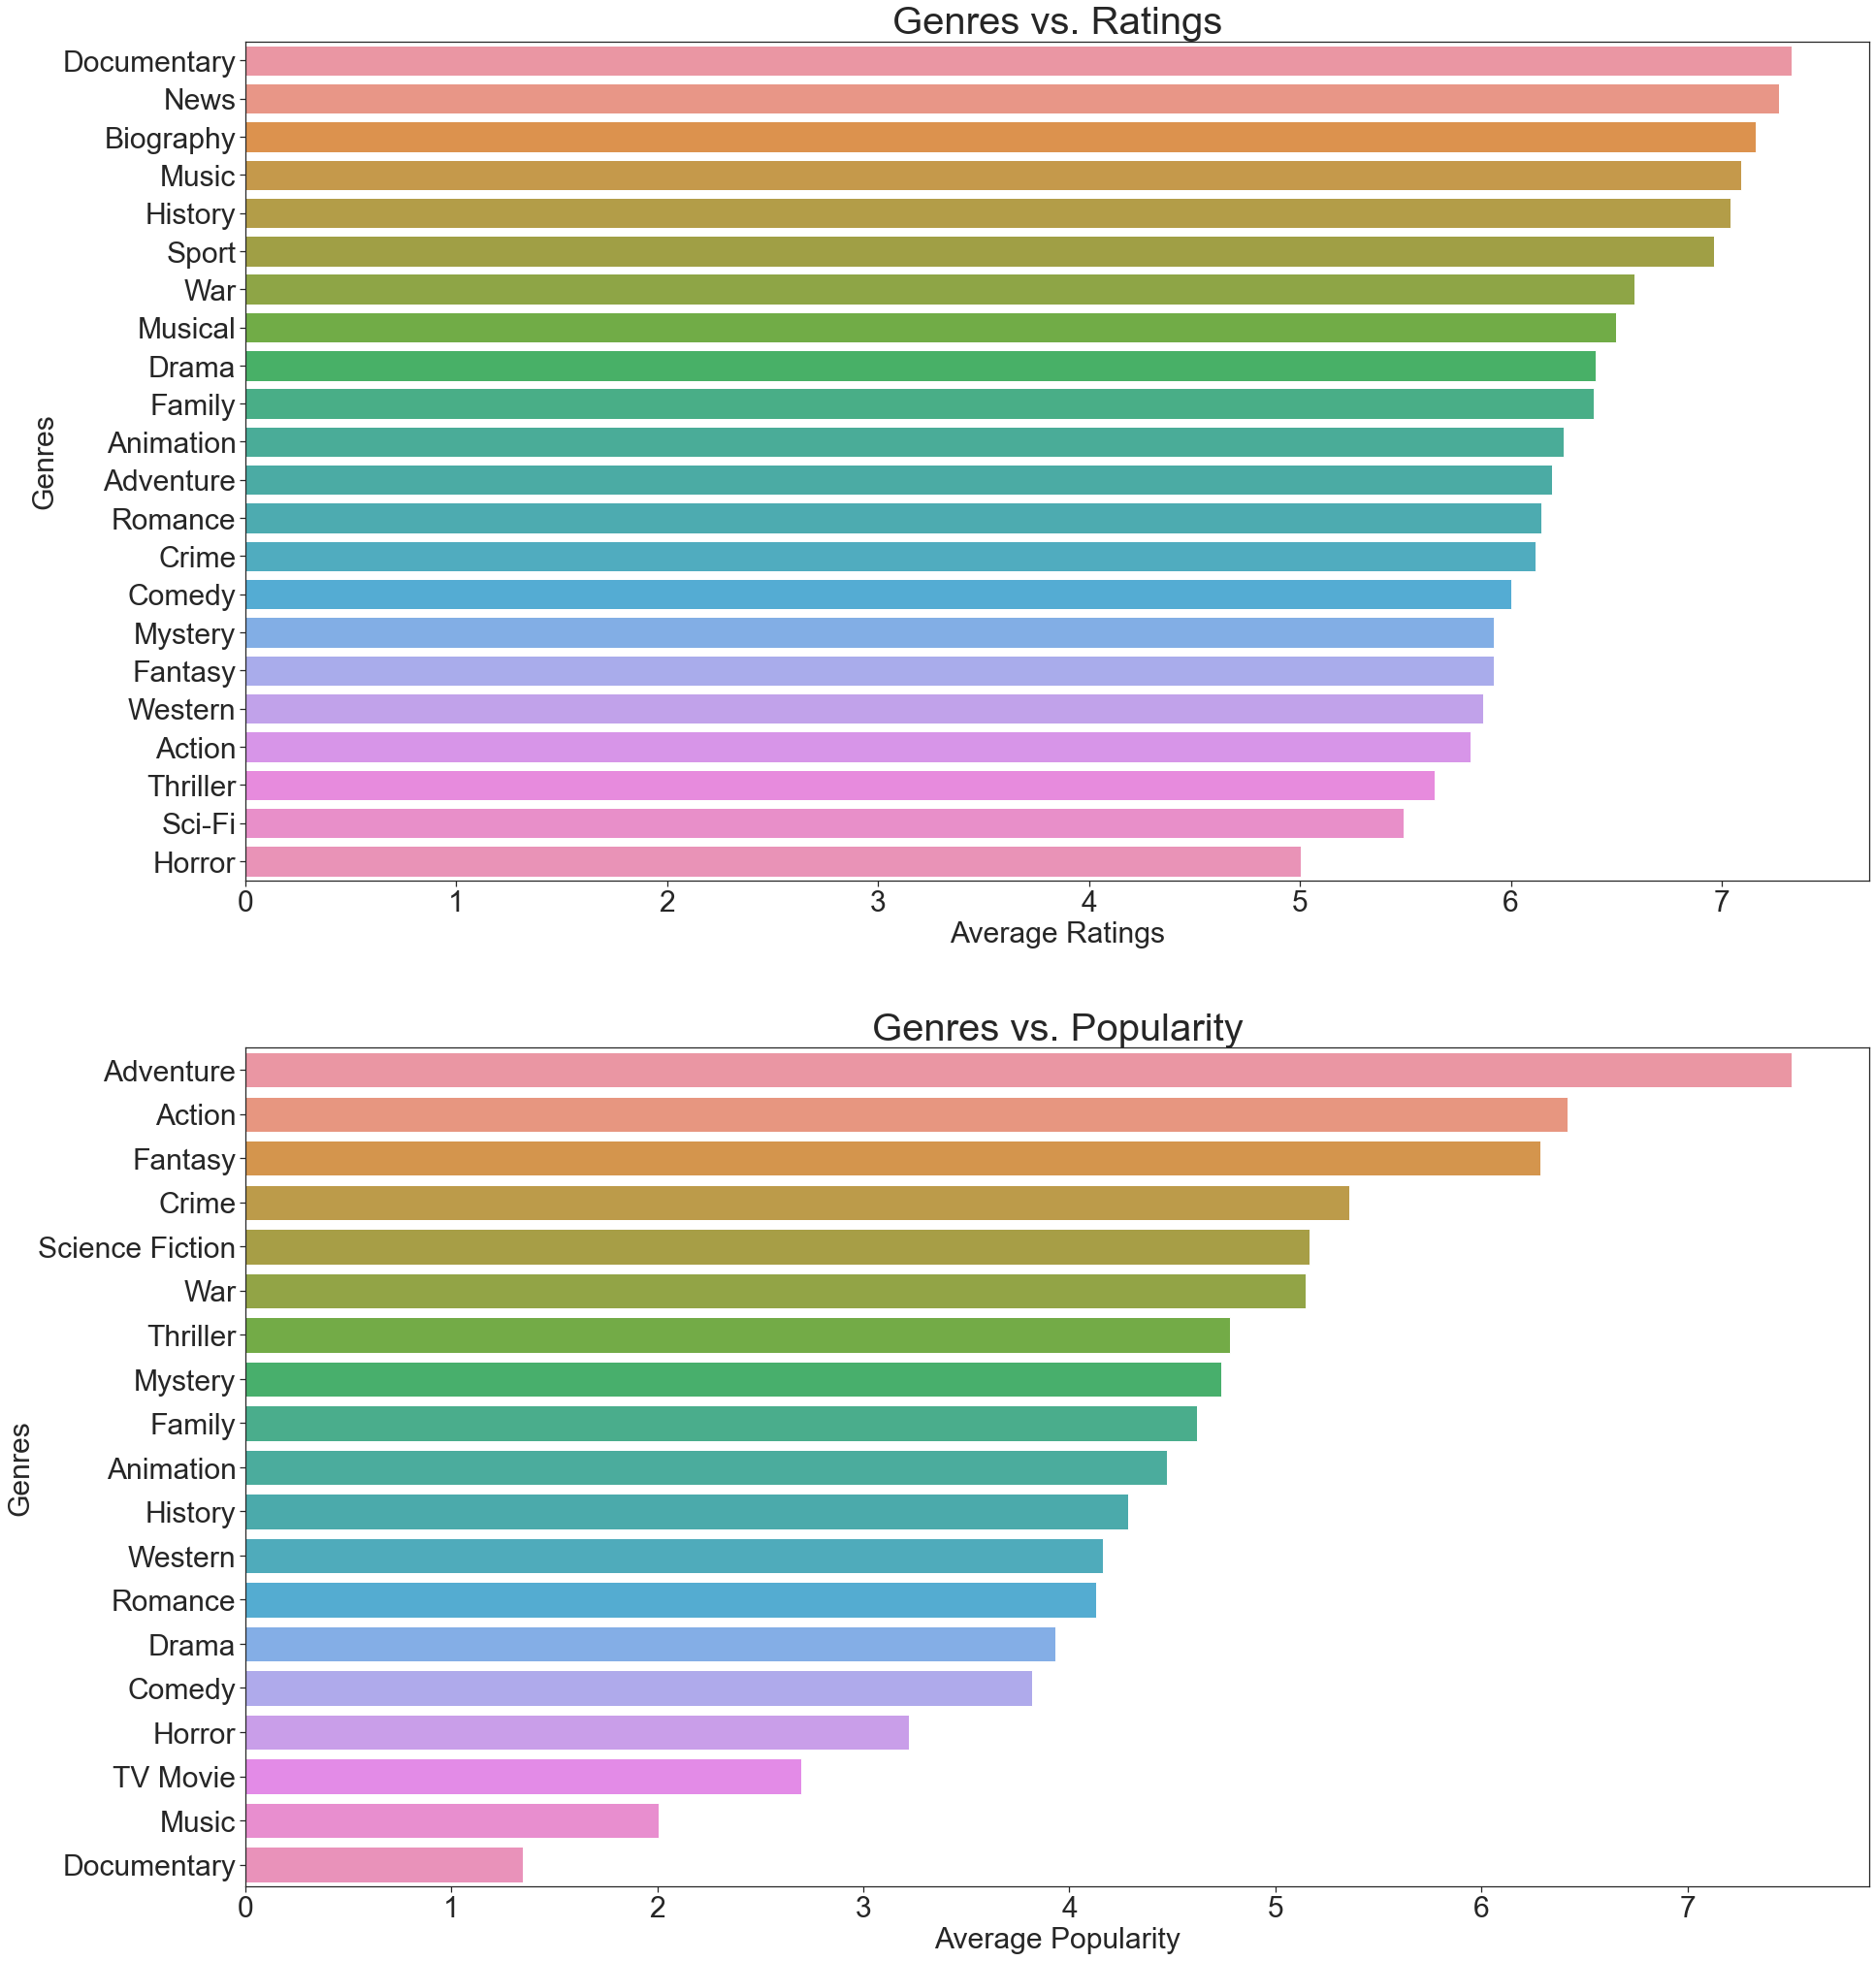

In [31]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
figure, axs= plt.subplots(nrows=2, figsize=(30, 35))

sns.barplot(y=imdb_genre_rating_df.index, x ='averagerating', data=imdb_genre_rating_df, ax=axs[0])
sns.barplot(y=tmdb_pop_genre_df.index, x = 'popularity', data=tmdb_pop_genre_df, ax=axs[1])

axs[0].set_title('Genres vs. Ratings', fontsize=40)
axs[0].set_xlabel('Average Ratings', fontsize=30);
axs[0].set_ylabel('Genres', fontsize=30)
axs[0].tick_params(labelsize=30)


axs[1].set_title('Genres vs. Popularity', fontsize=40)
axs[1].set_ylabel('Genres', fontsize=30)
axs[1].set_xlabel('Average Popularity', fontsize=30)
axs[1].tick_params(labelsize=30);

#### 3.2. Conclusion

According to both analyses, it is seen that there is no straightforward answer for which genre types should be recommended to the Microsoft Studio team. 

If the Microsoft team more concerned about the ratings of their future films, producing movies in Documentary, News, or Biography categories will be a better option. These genres have less total movie counts, but they have higher ratings due to their niche audience. However, choosing genre type according to average rating measure cannot guarentee it will be watched by general audience.

On the other hand, if the Microsoft team is more concerned about the popularity of their future films, sticking to Adventure, Action, or Fantasy genres will be a better option. These genres will bring more popularity to their future movies, which can also increase popularity of Microsoft brand itself. These movies reach larger general audience rather than niche group of viewers.

Therefore, we can conclude that choosing the best genre for a future movie depends heavily on the expectation of the Microsoft team. 

For further investigation, maybe a 'better' measure can be constructed by combining average ratings with popularity. This new measure can give Microsoft team a new insight to decide genre types by comparing average ratings per popularity for each genre category.


---

# Appendix

## A.1. Average Ratings per Popularity Measure for Movie Genres

In order to calculate average ratings per popularity, we will use TMDB movies data stored in in 'tmdb.movies.csv' file, and focus on movies with release year between 2010 to 2019. For popularity analysis above, we cleaned the data, filtered out the years which are out of our range, and exploded genre names into seperate rows. For this analysis we will use the same dataframe by focusung on 'popularity', 'vote_average', and 'genre_ids' columns.

This analysis may give more accurate results if the IMDB dataframe is merged with TMDB dataframe, and then average rating values are used from IMDB dataframe and popularity values are used from TMDB dataframe. This approach is recommended as a next step of genre analysis, but now we will stick with 'vote_average' from TMDB dataframe as a proxy for average ratings for this work. 

Let's starts recalling the TMDB dataframe from above.

In [32]:
tmdb_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44820 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         44820 non-null  int64  
 1   genre_ids          44820 non-null  object 
 2   id                 44820 non-null  int64  
 3   original_language  44820 non-null  object 
 4   original_title     44820 non-null  object 
 5   popularity         44820 non-null  float64
 6   release_date       44820 non-null  object 
 7   title              44820 non-null  object 
 8   vote_average       44820 non-null  float64
 9   vote_count         44820 non-null  int64  
 10  release_year       44820 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 5.4+ MB


In [33]:
ratings_per_popularity = tmdb_exploded[['genre_ids','popularity', 'vote_average']]
ratings_per_popularity

,genre_ids,popularity,vote_average
0,Adventure,33.533,7.7
0,Fantasy,33.533,7.7
0,Family,33.533,7.7
1,Fantasy,28.734,7.7
1,Adventure,28.734,7.7
...,...,...,...
26515,Family,0.600,0.0
26515,Adventure,0.600,0.0
26515,Action,0.600,0.0
26516,Thriller,0.600,0.0


In [34]:
ratings_per_popularity_df = ratings_per_popularity.groupby(['genre_ids']).mean()
ratings_per_popularity_df

,popularity,vote_average
genre_ids,,
Action,6.417480,5.563148
Adventure,7.506921,5.919956
Animation,4.472171,6.456543
Comedy,3.819133,5.934322
Crime,5.360015,5.864286
Documentary,1.348641,6.817209
Drama,3.933752,6.104642
Family,4.618991,5.976983
Fantasy,6.287668,5.931357


In [35]:
ratings_per_popularity_df['ratingperpopularity'] = ratings_per_popularity_df['vote_average']/ ratings_per_popularity_df['popularity']
ratings_per_popularity_df 

,popularity,vote_average,ratingperpopularity
genre_ids,,,
Action,6.417480,5.563148,0.866874
Adventure,7.506921,5.919956,0.788600
Animation,4.472171,6.456543,1.443715
Comedy,3.819133,5.934322,1.553840
Crime,5.360015,5.864286,1.094080
Documentary,1.348641,6.817209,5.054875
Drama,3.933752,6.104642,1.551863
Family,4.618991,5.976983,1.294002
Fantasy,6.287668,5.931357,0.943332


In [36]:
ratings_per_popularity_df['ratingperpopularity'].describe()

count    19.000000
mean      1.616851
std       1.017836
min       0.788600
25%       1.105857
50%       1.429755
75%       1.550970
max       5.054875
Name: ratingperpopularity, dtype: float64

In [37]:
df_rating_per_popularity = ratings_per_popularity_df.sort_values(by='ratingperpopularity', ascending =False)

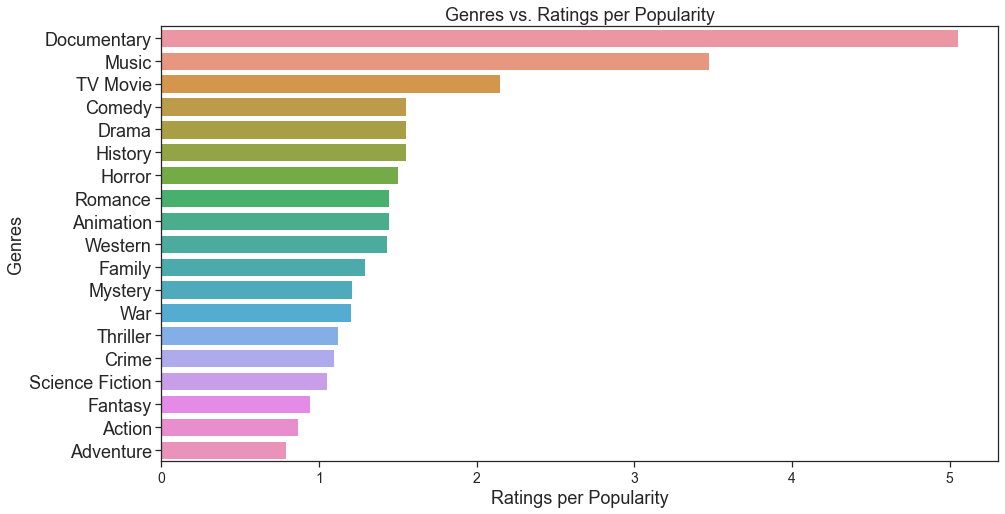

In [38]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=df_rating_per_popularity.index, x = 'ratingperpopularity', data=df_rating_per_popularity)
ax.set_title('Genres vs. Ratings per Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Ratings per Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);

This final analysis shows that a future movie with documentary genre is the best option if you are using ratings per popularity measure!